In [20]:
import numpy as np
import math
from statsmodels.distributions.empirical_distribution import ECDF
import texttable as ttable
import matplotlib.pyplot as plt


In [21]:
def get_bounds(mean, deviation):
    coef_mtrx = np.array([[1, 1], [1, -1]])
    free_el_vector = np.array([2 * mean, math.pow((12 * deviation), 1 / 2)])
    result = np.linalg.solve(coef_mtrx, free_el_vector)
    return result[1], result[0]


def g(y):
    return math.atan(y)


def cdf_y(y):
    return math.tan(y) / 18 + 0.32


def get_x_var_series(a, b):
    random_dist_nums = np.linspace(0, 1, 100)
    x_variations = [i * (b - a) + a for i in random_dist_nums]
    x_variations.sort()
    return x_variations


def get_y_var_series(x_series):
    result = [g(x) for x in x_series]
    result.sort
    return result


def print_cdf_table(cdf):
    table = ttable.Texttable()
    table.header(['x', 'F(x)'])
    for i in range(len(cdf.x)):
        table.add_row([cdf.x[i], cdf.y[i]])
        
    print(table.draw())


def show_cdf_plot(x_1, p_1):
    plt.plot(x, p)
    plt.ylabel('P(x)')
    plt.xlabel('x')
    plt.show()



+--------+-------+
|   x    | F(x)  |
+========+=======+
| -inf   | 0     |
+--------+-------+
| -1.429 | 0.010 |
+--------+-------+
| -1.425 | 0.020 |
+--------+-------+
| -1.421 | 0.030 |
+--------+-------+
| -1.417 | 0.040 |
+--------+-------+
| -1.413 | 0.050 |
+--------+-------+
| -1.408 | 0.060 |
+--------+-------+
| -1.403 | 0.070 |
+--------+-------+
| -1.398 | 0.080 |
+--------+-------+
| -1.392 | 0.090 |
+--------+-------+
| -1.386 | 0.100 |
+--------+-------+
| -1.380 | 0.110 |
+--------+-------+
| -1.373 | 0.120 |
+--------+-------+
| -1.366 | 0.130 |
+--------+-------+
| -1.358 | 0.140 |
+--------+-------+
| -1.350 | 0.150 |
+--------+-------+
| -1.341 | 0.160 |
+--------+-------+
| -1.331 | 0.170 |
+--------+-------+
| -1.320 | 0.180 |
+--------+-------+
| -1.309 | 0.190 |
+--------+-------+
| -1.296 | 0.200 |
+--------+-------+
| -1.282 | 0.210 |
+--------+-------+
| -1.266 | 0.220 |
+--------+-------+
| -1.249 | 0.230 |
+--------+-------+
| -1.230 | 0.240 |
+--------+--

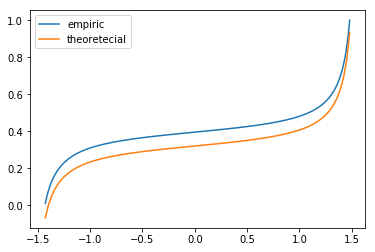

In [22]:
if __name__ == '__main__':
    a, b = get_bounds(2, 27)
    x_series = get_x_var_series(a, b)
    y_series = get_y_var_series(x_series)

    ecdf = ECDF(y_series)

    y_theoretical = np.linspace(g(a), g(b), 100)
    p_theoretical = [cdf_y(y) for y in y_theoretical]

    print_cdf_table(ecdf)

    plt.plot(ecdf.x, ecdf.y, label='empiric')
    plt.plot(y_theoretical, p_theoretical, label='theoretecial')
    plt.legend(loc='best')
    plt.show()